# 

In [74]:
#Loading improtant libraries for the code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

Loading the data for imu in four different positions

In [75]:
# Loading the data for imu in four different positions
# The data is in the form of csv files
half_theta_2 = pd.read_csv('Half_theta_2.csv') 
df = half_theta_2
df.head()


,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,1007,-66,-48,0,346576,440.875053
1,1007,-72,-59,0,371498,465.658903
2,1008,-75,-45,0,396502,490.717888
3,1006,-65,-53,0,421509,515.764952
4,1011,-67,-53,0,446513,540.741920


In [76]:
df['delta_time'] = df['pcTime'].diff()
df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,1007,-66,-48,0,346576,440.875053,NaN
1,1007,-72,-59,0,371498,465.658903,24.783850
2,1008,-75,-45,0,396502,490.717888,25.058985
3,1006,-65,-53,0,421509,515.764952,25.047064
4,1011,-67,-53,0,446513,540.741920,24.976969
5,1008,-74,-44,0,471520,565.711021,24.969101
6,1007,-75,-54,0,496524,590.770006,25.058985
7,1009,-70,-54,0,521532,615.640163,24.870157
8,1011,-68,-55,0,546535,640.830040,25.189877
9,1008,-77,-49,0,571542,665.774107,24.944067


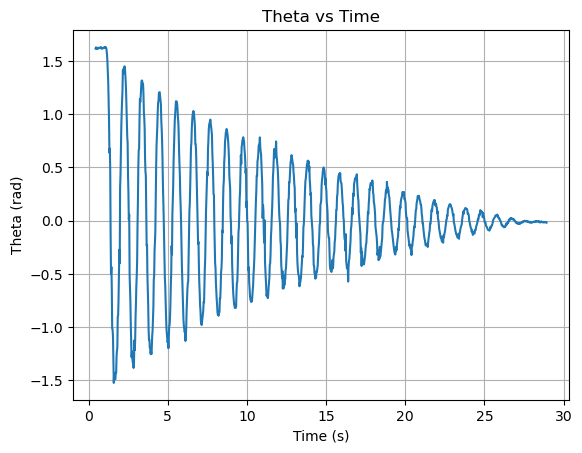

In [77]:
# plotting the angle of the IMU (theta) over time
theta = np.arctan2(df['xAccl'], df['zAccl'])
# theta = np.degrees(theta)
plt.plot(df['pcTime']/1000, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Time')
plt.grid()
plt.show()



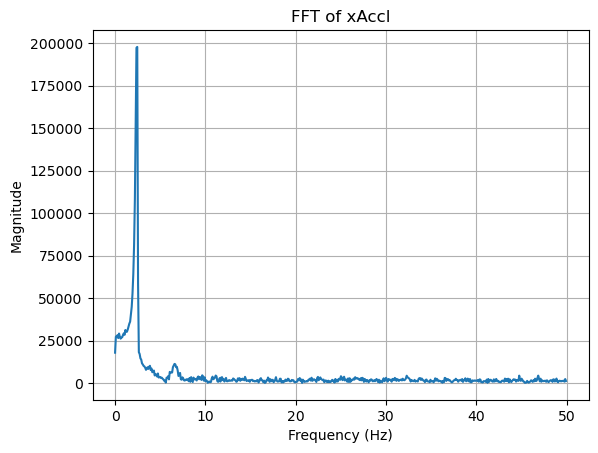

In [78]:
## plotting the angle of the IMU (theta) over time

data = fft(df['xAccl']) # FFT of the xAccl data
fftfreqs = fftfreq(len(data), d=0.01) ##### Sampling frequency is 100Hz
plt.plot(fftfreqs[:len(data)//2], np.abs(data)[:len(data)//2]) # Plotting only the positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of xAccl')
plt.grid()
plt.show()



In [79]:
# Plotting the FFT of the xAccl data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from pykalman import KalmanFilter


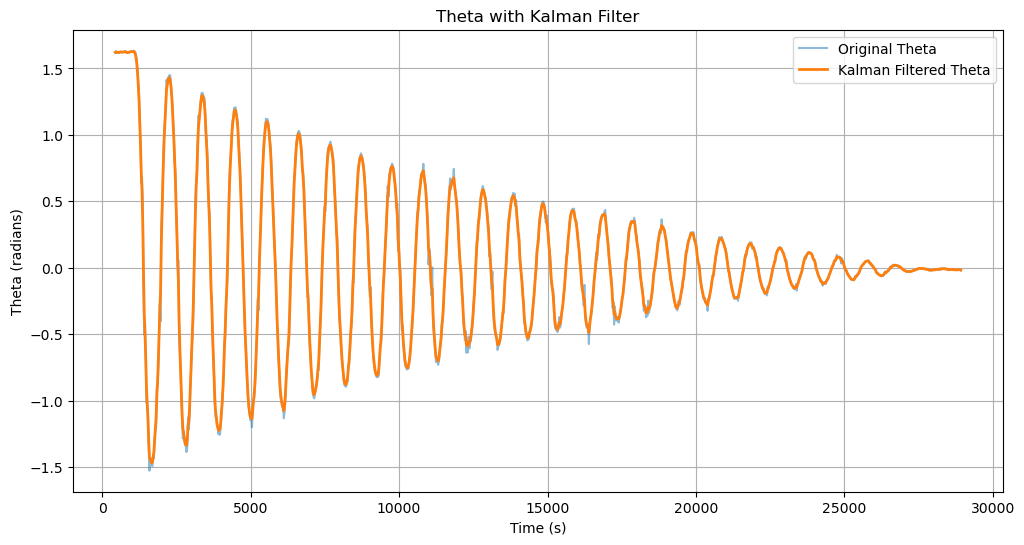

In [80]:

# Calculate theta from accelerometer data
theta = np.arctan2(df['xAccl'], df['zAccl'])

# Initialize Kalman filter
kf = KalmanFilter(
    initial_state_mean=theta[0],
    transition_matrices=[1],  # Assumes state transition is 1: x_k = x_{k-1}
    observation_matrices=[1],  # Measurement is directly related to state
    transition_covariance=[[1e-3]],  # Process noise
    observation_covariance=[[0.001]]  # Measurement noise
)

## Apply Kalman filter
theta_kalman, _ = kf.smooth(theta)

# Plot original and filtered theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_kalman, label='Kalman Filtered Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()


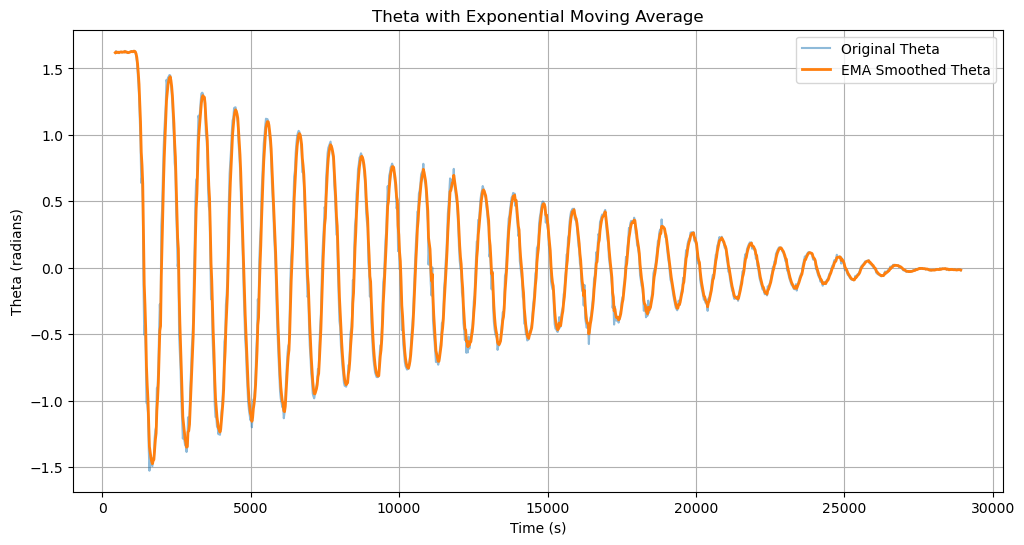

In [81]:


# Apply Exponential Moving Average (EMA) to the 'theta' column
def exponential_moving_average(data, window_size):
    alpha = 3 / (window_size + 1)
    ema = np.zeros_like(data)
    ema[0] = data[0]  # Initialize the first value
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i - 1]
    return ema
# Set the window size for EMA
window_size = 5
# Calculate EMA
theta_ema = exponential_moving_average(theta, window_size)
# Plot original and EMA smoothed theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_ema, label='EMA Smoothed Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Exponential Moving Average')
plt.legend()
plt.grid(True)
plt.show()



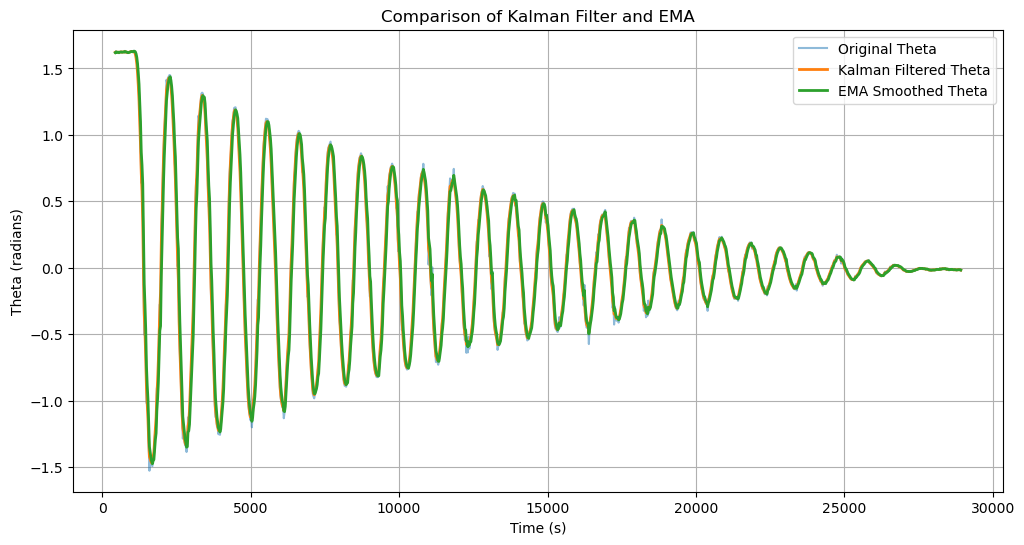

In [82]:
# compare the performance of the Kalman filter and the Exponential Moving Average (EMA) smoothing techniques
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_kalman, label='Kalman Filtered Theta', linewidth=2)
plt.plot(df['pcTime'], theta_ema, label='EMA Smoothed Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Comparison of Kalman Filter and EMA')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# compare the performance of the Kalman filter and the Exponential Moving Average (EMA) smoothing techniques by calculating the Mean Squared Error (MSE) for both methods
def mean_squared_error(original, smoothed):
    return np.mean((original - smoothed) ** 2)
# Calculate MSE for Kalman Filter and EMA
#mse_kalman = mean_squared_error(theta, theta_kalman)
theta_kalman = theta_kalman.reshape(-1)
theta_ema = theta_ema.reshape(-1)
# Calculate MSE for Kalman Filter and EMA

mse_ema = mean_squared_error(theta, theta_ema)
# Print MSE values
print(f'Mean Squared Error (Kalman Filter): {mse_kalman}')
print(f'Mean Squared Error (EMA): {mse_ema}')


Mean Squared Error (Kalman Filter): 0.0007732947166980487
Mean Squared Error (EMA): 0.006159003781867425



## Performance Comparison: Kalman Filter vs. Exponential Moving Average (EMA)

### The **Kalman filter** is a recursive algorithm designed to estimate the state of a dynamic system from noisy measurements. By incorporating a model of the system dynamics and noise characteristics, it produces optimal and adaptive state estimates, even in environments with significant uncertainty and variability.

### In contrast, the **Exponential Moving Average (EMA)** is a simpler smoothing technique that applies exponentially decreasing weights to past observations. While effective for reducing short-term fluctuations, it lacks the adaptability and precision of the Kalman filter in dynamic, noisy systems.

### Mean Squared Error (MSE) Comparison

| Filter Type                      | Mean Squared Error (MSE) |
|----------------------------------|---------------------------|
| Kalman Filter                    | 0.000773                  |
| Exponential Moving Average (EMA) | 0.006159                 |

### The Kalman filter achieves a significantly lower MSE, indicating superior performance in filtering out noise and providing accurate estimates. This reinforces its suitability for real-time applications where precision and responsiveness are critical.



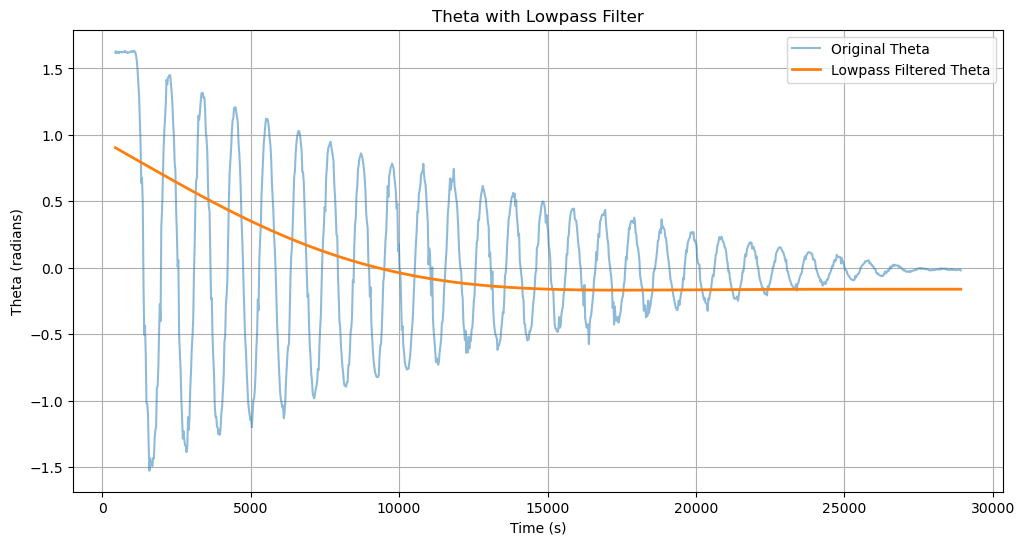

In [86]:
# create a low pass filter using scipy
from scipy.signal import butter, filtfilt
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
# Set the cutoff frequency and sampling frequency
cutoff = 0.1  # Desired cutoff frequency of the filter, Hz
fs = 100  # Sampling frequency, Hz
order = 5  # Order of the filter
# Apply lowpass filter to the theta data
theta_lowpass = lowpass_filter(theta, cutoff, fs, order)
# Plot original and lowpass filtered theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_lowpass, label='Lowpass Filtered Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Lowpass Filter')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (Kalman Filter): 0.0007732947166980487
Mean Squared Error (EMA): 0.006159003781867425
Mean Squared Error (Lowpass Filter): 0.3538316673866914


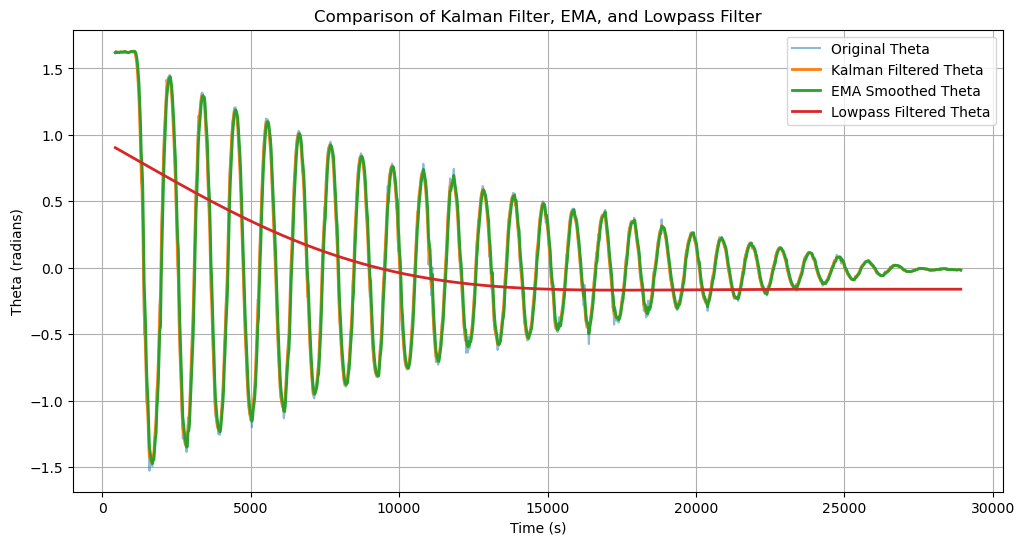

In [88]:

# compare the performance of the Kalman filter and the Exponential Moving Average (EMA) smoothing techniques by calculating the Mean Squared Error (MSE) for both methods
def mean_squared_error(original, smoothed):
    return np.mean((original - smoothed) ** 2)
# Calculate MSE for Kalman Filter and EMA
mse_kalman = mean_squared_error(theta, theta_kalman)
theta_kalman = theta_kalman.reshape(-1)
theta_ema = theta_ema.reshape(-1)
# Calculate MSE for Kalman Filter and EMA
mse_ema = mean_squared_error(theta, theta_ema)

# Print MSE values
print(f'Mean Squared Error (Kalman Filter): {mse_kalman}')
print(f'Mean Squared Error (EMA): {mse_ema}')
print(f'Mean Squared Error (Lowpass Filter): {mse_lowpass}')
# Plot original and filtered theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_kalman, label='Kalman Filtered Theta', linewidth=2)
plt.plot(df['pcTime'], theta_ema, label='EMA Smoothed Theta', linewidth=2)
plt.plot(df['pcTime'], theta_lowpass, label='Lowpass Filtered Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Comparison of Kalman Filter, EMA, and Lowpass Filter')
plt.legend()
plt.grid(True)
plt.show()


# Lab 2: Filtering Real-Time Sensor Data for Digital Twin

## Objective
### Enhance the digital twin model of a pendulum by incorporating real-time sensor data and applying optimal signal filtering for accurate dynamic state estimation.

---

## Filter Comparison: Mean Squared Error (MSE)

| Filter Type        | Mean Squared Error (MSE) |
|--------------------|--------------------------|
| **Kalman Filter**  | **0.000773**             |
| **Exponential Moving Average (EMA)** | 0.006159   |
| **Lowpass Filter** | 0.353832                 |

- ✅ **Kalman Filter** achieved the **lowest MSE**, indicating it is the most accurate and noise-resilient option for estimating the pendulum's angle (`theta`) and pivot movement.
-  **EMA** offers simplicity and low computational cost but lacks dynamic adaptability.
-  **Lowpass Filter** resulted in significant distortion and lag, unsuitable for real-time or dynamic systems.




In [84]:
theta_kalman = theta_kalman.reshape(-1)


In [85]:
# Calculate theta from accelerometer data
# Create a new dataframe with theta and pcTime
theta_data = pd.DataFrame({
    'pcTime': df['pcTime'],
    'theta': theta_kalman
})

# Save to CSV file
theta_data.to_csv('theta.csv', index=False)
print("Data saved to theta.csv")


Data saved to theta.csv
